In [10]:
import librosa
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
from pydub import AudioSegment

In [406]:
y, sr = librosa.load(r"D:\my_knowledge\research_assistant\python_project\speech_recognition\audio\song_demo.mp3")

In [407]:
o_env = librosa.onset.onset_strength(y=y, sr=sr)

In [408]:
o_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median,fmax=2000, n_mels=256)

In [409]:
times = librosa.times_like(o_env, sr=sr)

In [410]:
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

(24.7, 27.5)

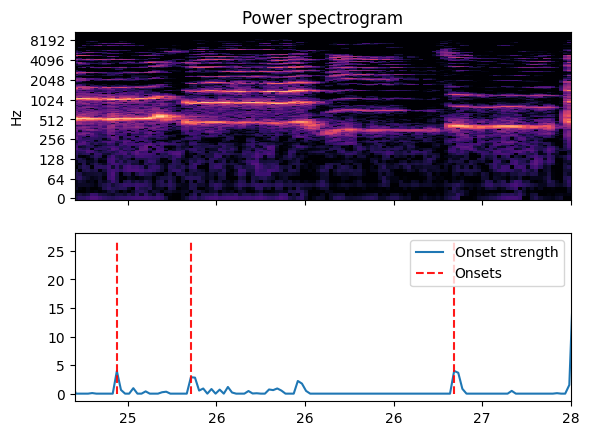

In [411]:
import matplotlib.pyplot as plt
D = np.abs(librosa.stft(y))
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
           linestyle='--', label='Onsets')
ax[1].legend()
ax[1].set_xlim([24.70, 27.50])

In [395]:
audio = AudioSegment.from_file(r"D:\my_knowledge\research_assistant\python_project\speech_recognition\audio\song_demo.mp3")

In [396]:
segment = audio[24.70 * 1000 : 27.50 * 1000]

In [397]:
type(segment)

pydub.audio_segment.AudioSegment

In [398]:
segment.export(r"D:\my_knowledge\research_assistant\python_project\speech_recognition\audio\songdemo_seg_test.wav", format="wav")

<_io.BufferedRandom name='D:\\my_knowledge\\research_assistant\\python_project\\speech_recognition\\audio\\songdemo_seg_test.wav'>